<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/main/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# **Todo o dataset**

In [ ]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


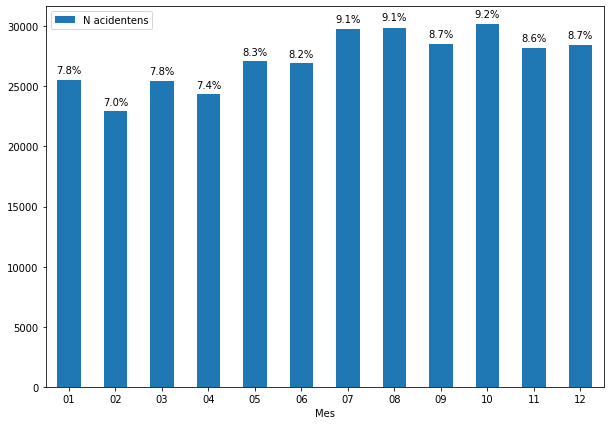

In [ ]:
percentages=[]

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(data)) 
    ax.annotate(f'{round(height/len(data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')


In [ ]:
new_data= pd.DataFrame(columns = data.columns)
datas=[]

for name, group in mes_groupby:
  d=group.sample(int(round(10000*percentages[int(name)-1]))) 
  new_data.append(d, ignore_index = True)
  datas.append(d)


new_data=datas[0]

for i in range(1,12):
 new_data=pd.concat([new_data,datas[i]], ignore_index = True)

In [ ]:
new_data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,20191683757,2019:01:10 16:00:00,01/10/00,01/01/00,01/01/00,Guarda Nacional Republicana,90.0,90.0,Quinta-Feira,"41,091920",...,Inexistentes,No sentido crescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
1,20161023111,2016:01:28 08:20:00,01/28/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Quinta-Feira,"38,800978",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita
2,2010427486,2010:01:08 14:30:00,01/08/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sexta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda
3,20191680865,2019:01:17 13:20:00,01/17/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Quinta-Feira,"40,960900",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
4,20181365406,2018:01:06 18:30:00,01/06/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,"40,569908",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Esquerda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2011502943,2010:12:26 15:00:00,01/26/00,12/01/00,01/01/00,Polícia de Segurança Pública,80.0,100.0,Domingo,"0,00",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda
9996,20181627052,2018:12:12 16:00:00,01/12/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Quarta-Feira,38.7496241,...,Inexistentes,NÃO DEFINIDO,Cedência de passagem,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
9997,2012651474,2012:12:06 08:00:00,01/06/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Quinta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9998,20171336041,2017:12:19 12:45:00,01/19/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Terça-Feira,"38,743429",...,Inexistentes,No sentido decrescente da quilometragem,NÃO DEFINIDO,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda


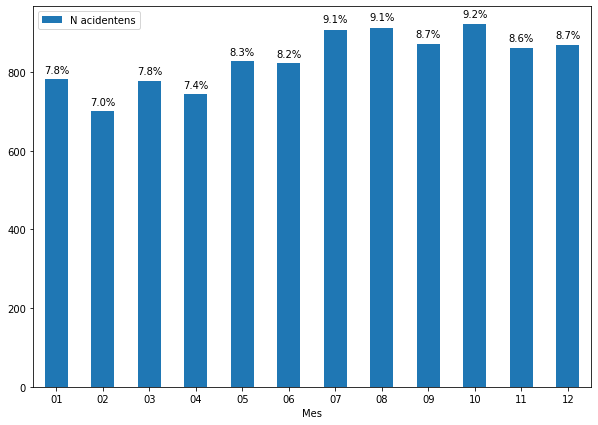

In [ ]:
percentages=[]

mes_groupby=new_data.groupby(new_data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(new_data)) 
    ax.annotate(f'{round(height/len(new_data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')

In [ ]:
new_data.to_csv('acidentes.csv', index=False)

# **Data Understanding**

## **Pergunta 1**

1. Extract a random sample of 10000+ examples taking random examples from all files
from 2010 to 2019. Save the sample;

In [261]:
acidentes_df=pd.read_csv('acidentes.csv',sep = ',')

In [262]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id. Acidente                     10000 non-null  int64  
 1   Datahora                         10000 non-null  object 
 2   Dia                              10000 non-null  object 
 3   Mês                              10000 non-null  object 
 4   Hora                             10000 non-null  object 
 5   Entidades Fiscalizadoras         10000 non-null  object 
 6   Velocidade local                 9893 non-null   float64
 7   Velocidade geral                 9989 non-null   float64
 8   Dia da Semana                    10000 non-null  object 
 9   Latitude GPS                     8994 non-null   object 
 10  Longitude GPS                    8990 non-null   object 
 11  Num. Mortos a 30 dias            10000 non-null  int64  
 12  Num. Feridos graves

In [263]:
acidentes_df=acidentes_df.drop(['Id. Acidente','Dia','Hora','Mês','Entidades Fiscalizadoras', 'Velocidade geral','Latitude GPS','Longitude GPS','Concelho', 'Freguesia', 'Pov. Proxima','Nome arruamento','Cod Via'], axis=1)

## **Pergunta 2**


2. Decide which (if any) characteristics should be normalized, discretized, or change format
in any way. Perform these transformations in the sample and save the new file
under a different name;

In [264]:
acidentes_df['Periodo do Dia']=acidentes_df['Datahora'].str.split(' ').str[-1]     

## METER A COLUNA DATAHORA PARA DATETIME
acidentes_df['Periodo do Dia'] = pd.to_datetime(acidentes_df['Periodo do Dia'])
     

In [265]:

slots=['06:00:00','12:00:00','18:00:00']
hours=pd.to_datetime(slots)

day_slots=[]
for index in acidentes_df.index:
  
  if acidentes_df['Periodo do Dia'][index] < hours[0]:
    day_slots.append('Madrugada')
  elif (acidentes_df['Periodo do Dia'][index] >= hours[0]) & (acidentes_df['Periodo do Dia'][index] < hours[1]):
    day_slots.append('Manha')
  elif  (acidentes_df['Periodo do Dia'][index] >= hours[1]) & (acidentes_df['Periodo do Dia'][index] < hours[2]):
    day_slots.append('Tarde')
  else:
    day_slots.append('Noite')



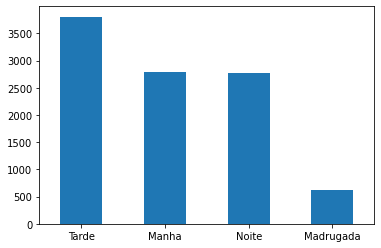

In [266]:
acidentes_df['Periodo do Dia']=day_slots
acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0)

In [267]:
accident_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Num. Mortos a 30 dias'][index]>0):    
    accident_type.append('muito grave')
  elif (acidentes_df['Num. Feridos graves a 30 dias'][index]>0) & (acidentes_df['Num. Mortos a 30 dias'][index]==0):
    accident_type.append('grave')
  else:
     accident_type.append('ligeiro')
print(len(accident_type))


10000


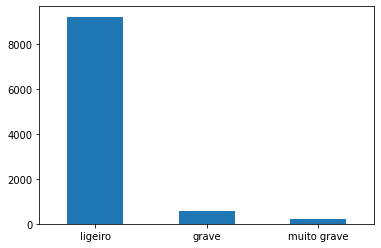

In [268]:
acidentes_df['Tipo de Acidente']=accident_type
acidentes_df['Tipo de Acidente'].value_counts().plot(kind = 'bar',rot = 0)

In [269]:
acidentes_df['Mes'] = acidentes_df['Datahora'].str.split(':').str[1]


In [270]:
acidentes_df

,Datahora,Velocidade local,Dia da Semana,Num. Mortos a 30 dias,Num. Feridos graves a 30 dias,Num. Feridos ligeiros a 30 dias,Características Tecnicas1,Cond Aderência,Distrito,Tipos Vias,...,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito,Periodo do Dia,Tipo de Acidente,Mes
0,2019:01:10 16:00:00,90.0,Quinta-Feira,0,0,1,Auto-estrada,Seco e limpo,Porto,A - Auto-Estrada,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Tarde,ligeiro,01
1,2016:01:28 08:20:00,50.0,Quinta-Feira,0,0,2,Estrada sem separador,Molhado,Lisboa,Arruamento,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,01
2,2010:01:08 14:30:00,50.0,Sexta-Feira,0,0,1,Estrada sem separador,Húmido,Santarém,Arruamento,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,01
3,2019:01:17 13:20:00,50.0,Quinta-Feira,0,0,1,Estrada sem separador,Seco e limpo,Aveiro,Arruamento,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Tarde,ligeiro,01
4,2018:01:06 18:30:00,50.0,Sábado,0,0,1,Estrada sem separador,Seco e limpo,Aveiro,EN - Estrada Nacional,...,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Esquerda,Noite,ligeiro,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2010:12:26 15:00:00,80.0,Domingo,0,0,4,Outra via,Seco e limpo,Lisboa,IC - Itinerário Complementar,...,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,12
9996,2018:12:12 16:00:00,50.0,Quarta-Feira,0,0,2,Estrada sem separador,Seco e limpo,Lisboa,Arruamento,...,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,12
9997,2012:12:06 08:00:00,50.0,Quinta-Feira,0,0,1,Estrada sem separador,Húmido,Lisboa,Arruamento,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,12
9998,2017:12:19 12:45:00,50.0,Terça-Feira,0,0,1,Outra via,Seco e limpo,Lisboa,Arruamento,...,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,12


In [271]:
acidentes_df=acidentes_df.drop(['Datahora'])

KeyError: ignored

## **Pergunta 3**

3. Verify which characteristics are seasonal (have different average values in different times of the year). Provide graphical views of these seasonal differences;

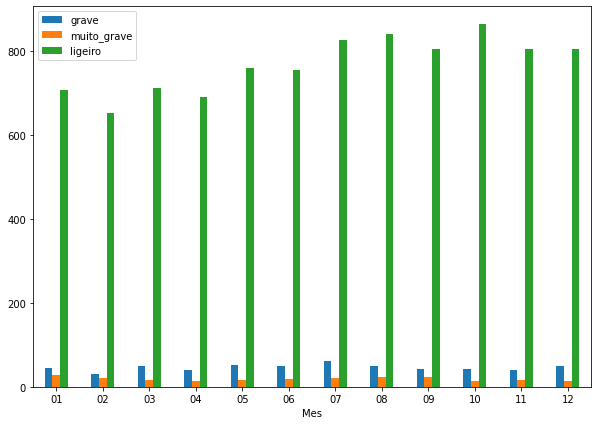

In [179]:

type_mes_groupby = acidentes_df.groupby([ 'Tipo de Acidente','mes']).size()
grave=type_mes_groupby['grave'].tolist()
muito_grave=type_mes_groupby['muito grave'].tolist()
ligeiro=type_mes_groupby['ligeiro'].tolist()


df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'grave':grave,'muito_grave':muito_grave,'ligeiro':ligeiro})
ax = df.plot.bar(x='Mes', y=['grave','muito_grave','ligeiro'], rot=0,figsize=(10, 7))



In [ ]:
#Fazer as estacoes do ano 

#Qual o tipo de acidente mais provavel de acontecer durante o periodo do dia 




## **Pergunta 4**

4. Verify which characteristics are unbalanced (have much more elements of one class
than the others). Present graphical views of the distributions of some unbalanced
characteristics you deem relevant for the problem;

In [182]:
acidentes_df.columns

Index(['Datahora', 'Velocidade local', 'Dia da Semana',
       'Num. Mortos a 30 dias', 'Num. Feridos graves a 30 dias',
       'Num. Feridos ligeiros a 30 dias', 'Características Tecnicas1',
       'Cond Aderência', 'Distrito', 'Tipos Vias', 'Estado Conservação', 'Km',
       'Factores Atmosféricos', 'Reg Circulação1', 'Intersecção Vias',
       'Localizações', 'Luminosidade', 'Marca Via', 'Natureza', 'Obras Arte',
       'Obstáculos', 'Sentidos', 'Sinais', 'Sinais Luminosos', 'Tipo Piso',
       'Traçado 1', 'Traçado 2', 'Traçado 3', 'Traçado 4', 'Via Trânsito',
       'mes', 'Tipo de Acidente'],
      dtype='object')

In [184]:
len(acidentes_df.columns)

32

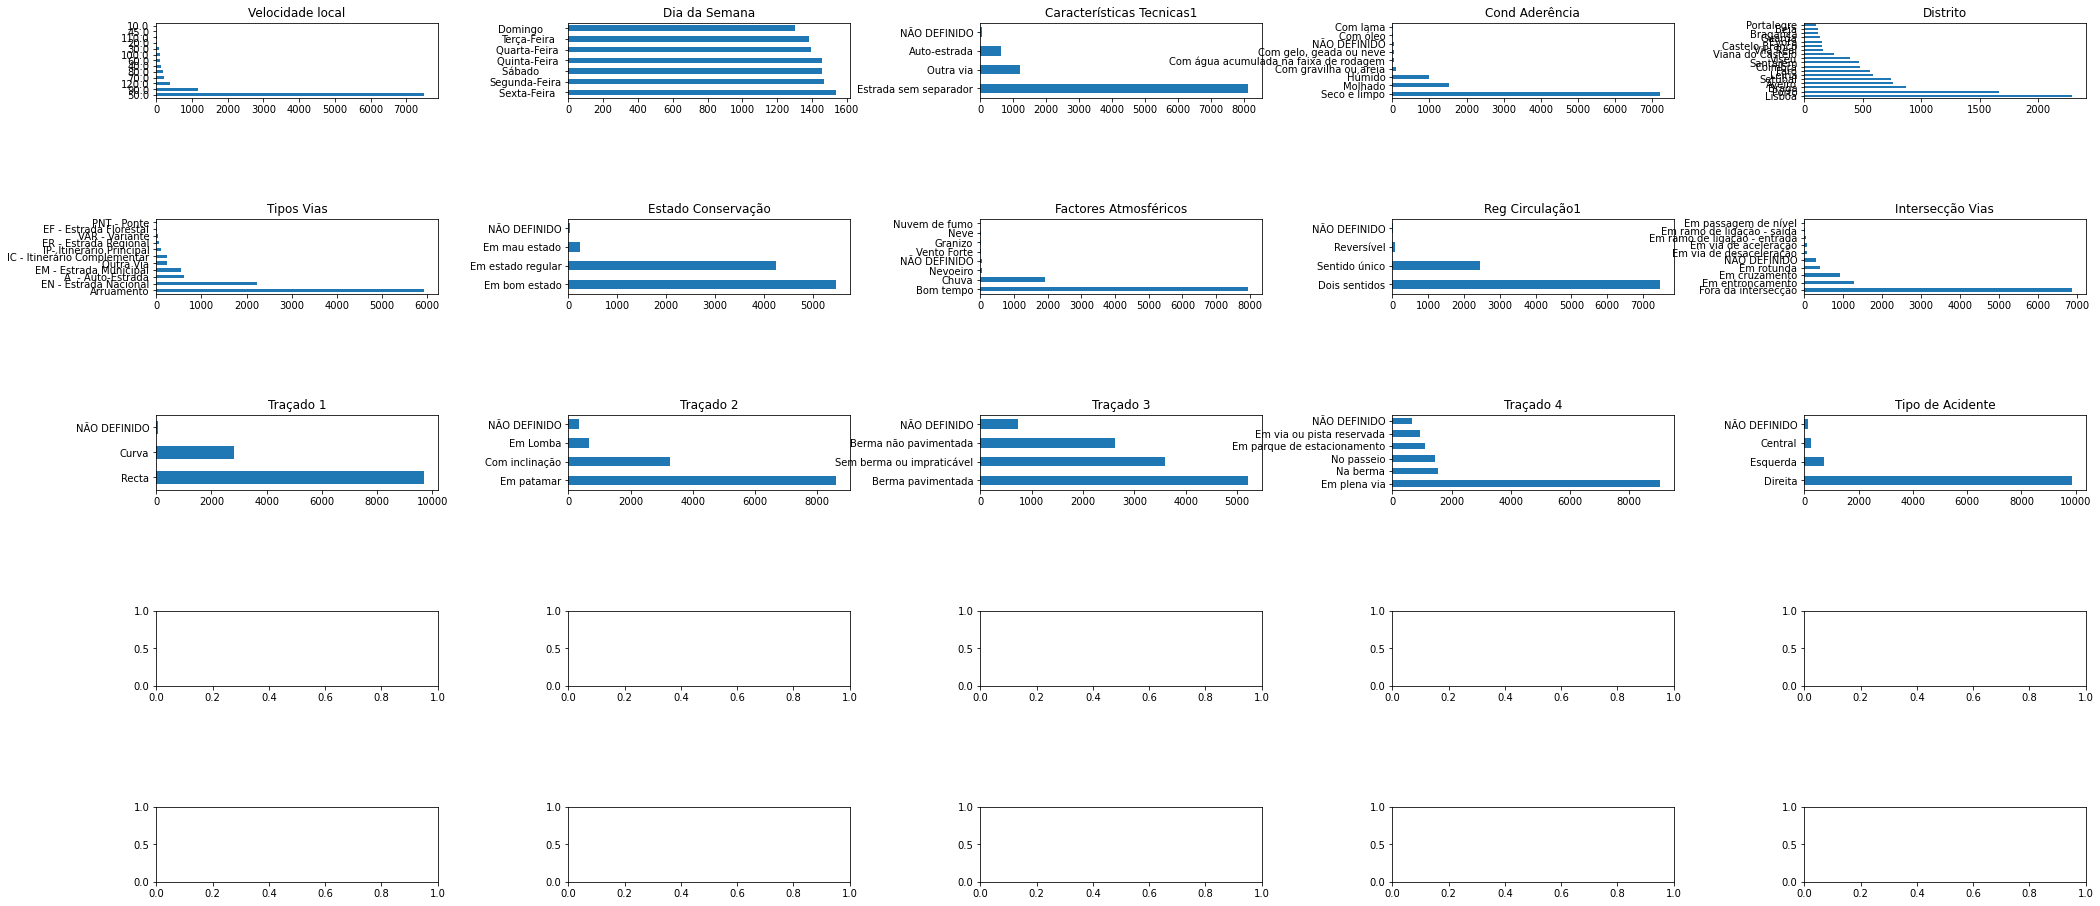

In [185]:

atributos = ['Velocidade local', 'Dia da Semana','Características Tecnicas1',
       'Cond Aderência', 'Distrito', 'Tipos Vias', 'Estado Conservação',
       'Factores Atmosféricos', 'Reg Circulação1', 'Intersecção Vias',
       'Localizações', 'Luminosidade', 'Marca Via', 'Natureza', 'Obras Arte',
       'Obstáculos', 'Sentidos', 'Sinais', 'Sinais Luminosos', 'Tipo Piso',
       'Traçado 1', 'Traçado 2', 'Traçado 3', 'Traçado 4', 'Via Trânsito',
     'Tipo de Acidente']

fig, axes = plt.subplots(nrows = 5,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(atributos):
    if i < 5:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif i >=10 and i < 15:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
    elif i >=15 and i < 20:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-15],rot = 0)
    elif i >=20 and i < 25:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-20],rot = 0)
   
    ax.set_title(item)

# **Coisas**

In [ ]:
data_graves= acidentes_df[(acidentes_df['Num. Feridos ligeiros a 30 dias']>0) &(acidentes_df['Num. Feridos graves a 30 dias']==0) & (acidentes_df['Num. Mortos a 30 dias']==0)]

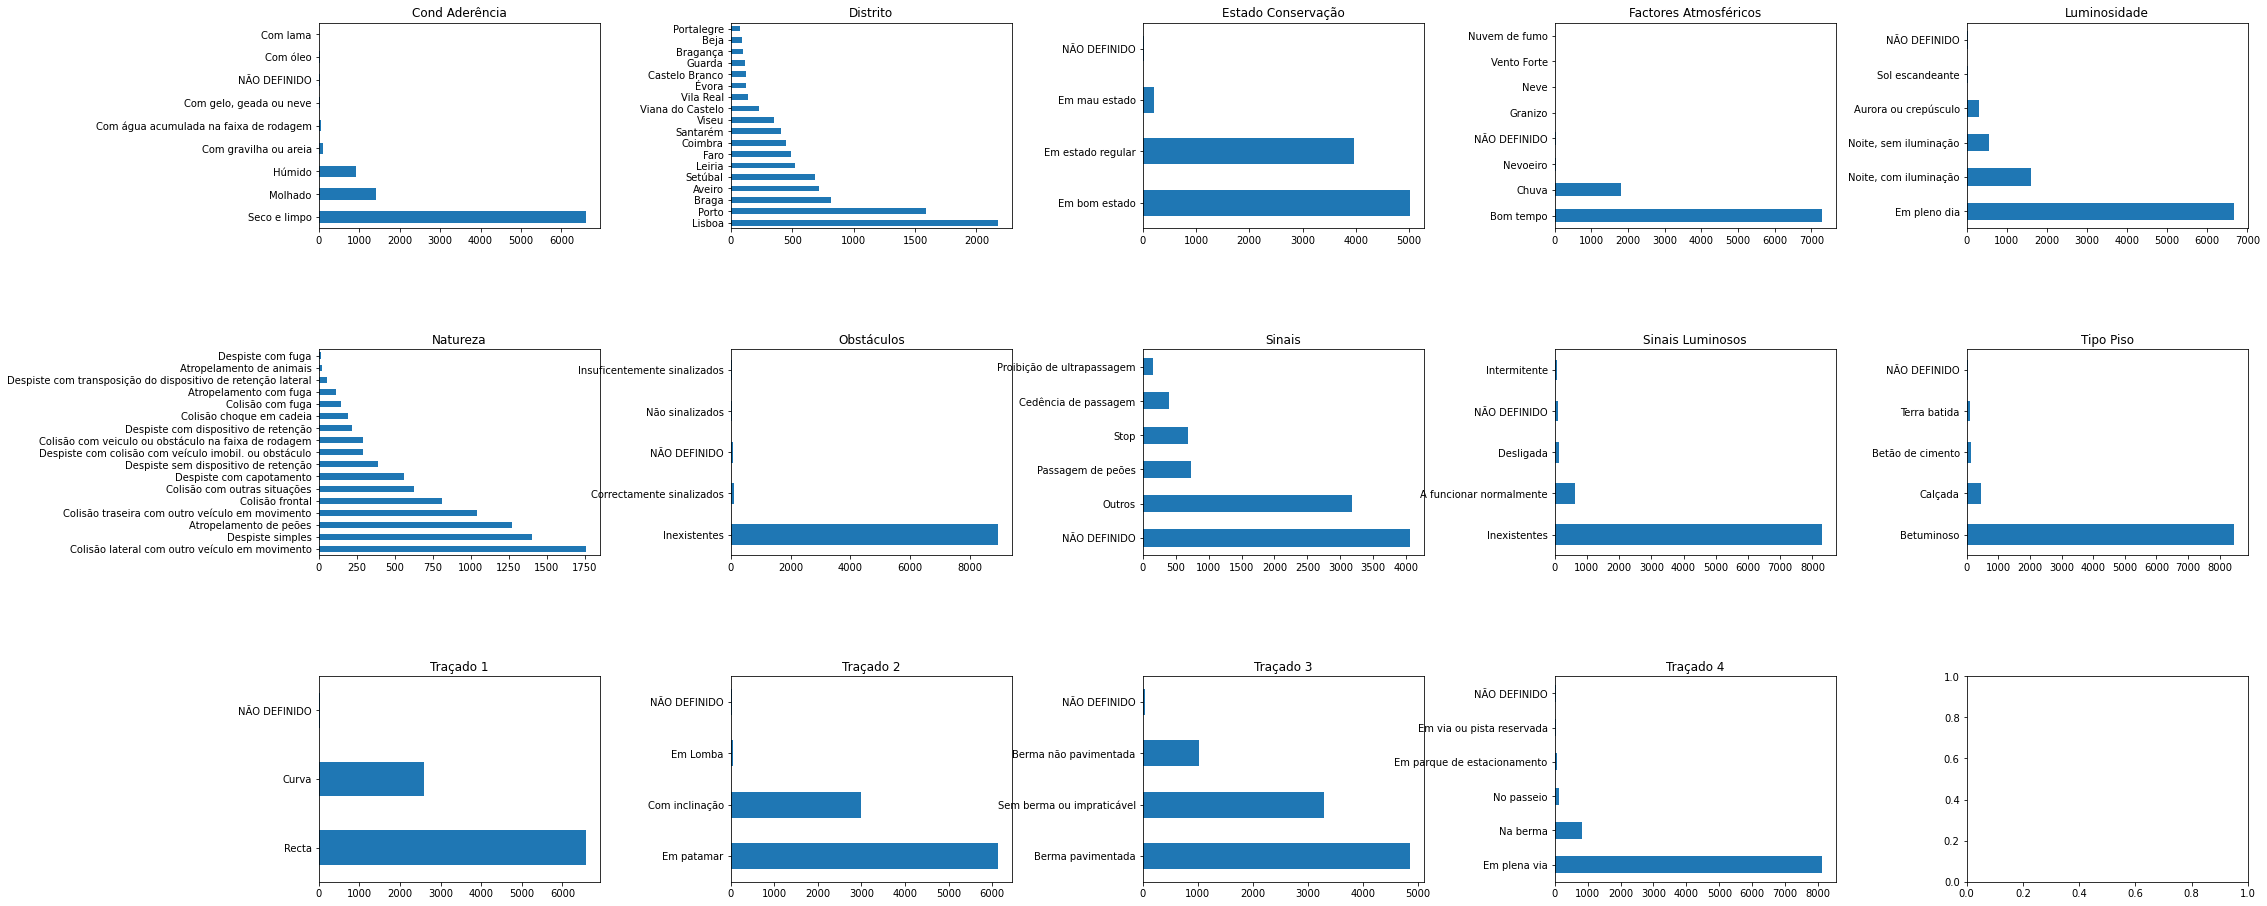

In [ ]:
services = ['Cond Aderência','Distrito','Estado Conservação','Factores Atmosféricos',
            'Luminosidade','Natureza','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Traçado 3','Traçado 4']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

In [ ]:
data['Datahora']=data['Datahora'].str.split(' ').str[-1]

In [ ]:
data=data.rename(columns={"Datahora": "Hora"})

In [ ]:
hours=['06:00:00','12:00:00','18:00:00']
d=pd.to_datetime(hours)

# mornin=data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]
# print(mornin)
feridos=[]
for ind in data.index:
  print(data['Hora'][ind])
  if data['Hora'][ind]<hours[0]:
    feridos.append('Madrugada')
  elif (data['Hora'][ind]>=hours[0]) & (data['Hora'][ind]<hours[1]):
    feridos.append('Manha')
  elif  (data['Hora'][ind]>=hours[1]) & (data['Hora'][ind]<hours[2]):
    feridos.append('Tarde')
  else:
    feridos.append('Noite')

print(feridos)

# conditions = [
#     (data[data['Hora'] <hours[0]]),
#     (data[(data['Hora']>=hours[0]) & (data['Hora']<hours[1])]),
#     ( data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]),
#     ( data[data['Hora']>=hours[2]])
# ]
# values=['Madrugada','Manha','Tarde','Noite']

# import numpy as np

# print(np.select(conditions, values))


14:15:00
11:15:00
12:45:00
11:50:00
19888    20:00:00
19888    18:40:00
Name: Hora, dtype: object


ValueError: ignored

In [ ]:
# feridos=['ligeiros', 'greves','mortes']
# n_feridos=[]
# n_feridos.append(data['Num. Feridos ligeiros a 30 dias'].sum())
# n_feridos.append(data['Num. Feridos graves a 30 dias'].sum())
# n_feridos.append(data['Num. Mortos a 30 dias'].sum())

# df = pd.DataFrame({'Feridos':feridos, 'N Feridos/Mortos':n_feridos})
# ax = df.plot.bar(x='Feridos', y='N Feridos/Mortos', rot=0)